# **Importano as  Bibliotecas Necessárias**

In [2]:
# !pip install scikeras
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import sklearn
print(sklearn.__version__)

1.2.2


In [4]:
# Importando as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier


# *Importando os Dados*

In [5]:
# Cria uma lista com os nomes das colunas
cols = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8","Y"]
# Imprimir a lista
# Imprimir a lista
len(cols)

9

In [6]:
path = 'https://raw.githubusercontent.com/Alisson-Ursulino-git/Machine_Learning/main/Dados_das_Listas/Lista_05/californiabin.csv'
DataFrame = pd.read_csv(path, names=cols)
DataFrame

,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,4.1685,20.0,6.700637,1.178344,745.0,2.372611,38.80,-121.15,1.0
1,2.8194,24.0,4.762500,1.020833,608.0,2.533333,36.75,-119.85,0.0
2,2.4250,46.0,4.927711,1.018072,772.0,2.325301,36.33,-119.31,0.0
3,3.1205,16.0,3.728477,1.101545,1260.0,2.781457,33.87,-117.99,0.0
4,4.3889,41.0,5.741007,1.199041,837.0,2.007194,34.15,-118.40,1.0
...,...,...,...,...,...,...,...,...,...
1995,0.9220,15.0,6.287671,1.301370,160.0,2.191781,33.36,-115.91,0.0
1996,3.4464,33.0,4.968085,1.060284,915.0,3.244681,37.45,-121.06,0.0
1997,6.8787,38.0,6.125203,0.980488,1455.0,2.365854,37.52,-122.29,1.0
1998,7.9761,52.0,7.709756,1.151220,842.0,2.053659,37.80,-122.44,1.0


# *Análise dos Dados*

In [7]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      2000 non-null   float64
 1   X2      2000 non-null   float64
 2   X3      2000 non-null   float64
 3   X4      2000 non-null   float64
 4   X5      2000 non-null   float64
 5   X6      2000 non-null   float64
 6   X7      2000 non-null   float64
 7   X8      2000 non-null   float64
 8   Y       2000 non-null   float64
dtypes: float64(9)
memory usage: 140.8 KB


In [8]:
DataFrame.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.904364,28.509500,5.417501,1.090020,1421.657500,2.909150,35.697790,-119.646690,0.500000
std,1.912417,12.715099,2.121688,0.348978,1225.902672,0.742232,2.150273,1.999555,0.500125
min,0.536000,2.000000,0.888889,0.500000,9.000000,1.066176,32.550000,-124.180000,0.000000
25%,2.586875,18.000000,4.439494,1.004505,784.000000,2.420881,33.940000,-121.840000,0.000000
50%,3.574450,28.000000,5.283862,1.048582,1173.000000,2.821757,34.355000,-118.685000,0.500000
75%,4.753675,38.000000,6.064881,1.098424,1714.250000,3.280020,37.720000,-118.050000,1.000000
max,15.000100,52.000000,56.269231,10.153846,28566.000000,9.196203,41.950000,-114.610000,1.000000


In [9]:
count_zeros = (DataFrame == 0.0).sum()
print(count_zeros)

X1       0
X2       0
X3       0
X4       0
X5       0
X6       0
X7       0
X8       0
Y     1000
dtype: int64


In [10]:
df = DataFrame.copy()
df['Y'] = df['Y'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      2000 non-null   float64
 1   X2      2000 non-null   float64
 2   X3      2000 non-null   float64
 3   X4      2000 non-null   float64
 4   X5      2000 non-null   float64
 5   X6      2000 non-null   float64
 6   X7      2000 non-null   float64
 7   X8      2000 non-null   float64
 8   Y       2000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 140.8 KB


#*SVM*

In [41]:
# Separa os atributos e a variável dependente
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Divide os dados em conjuntos de treinamento e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normaliza os dos dados de treinamento e teste usando as estatísticas dos dados de treinamento
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define os valores de C e gamma para o grid-search
C_values = [2**i for i in range(-5,16)]
gamma_values = [2**j for j in range(-5,4)]

# Cria o modelo SVM com kernel RBF
svm = SVC(kernel='rbf')

# Usa grid-search para ajustar os hiperparâmetros C e gamma
param_grid = {'C': C_values, 'gamma': gamma_values}
grid_search = GridSearchCV(svm, param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Imprime os melhores valores de C e gamma encontrados pelo grid-search
print('Melhor valor de C:', grid_search.best_params_['C'])
print('Melhor valor de gamma:', grid_search.best_params_['gamma'])

# Cria um novo modelo SVM com os melhores hiperparâmetros encontrados pelo grid-search
best_svm = SVC(kernel='rbf', C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'])
# Ajusta o modelo aos dados de treinamento e validação
best_svm.fit(X_train, y_train)


# Avalia o modelo no conjunto de teste
accuracy = best_svm.score(X_test, y_test)
print('Acurácia no conjunto de teste:', accuracy)



Melhor valor de C: 64
Melhor valor de gamma: 0.03125
Acurácia no conjunto de teste: 0.8475


***Gráfico***

Melhor valor de C: 64
Melhor valor de gamma: 0.03125
Acurácia: 0.8475
Revocação: 0.8737373737373737
Precisão: 0.8277511961722488
F1-score: 0.8501228501228502


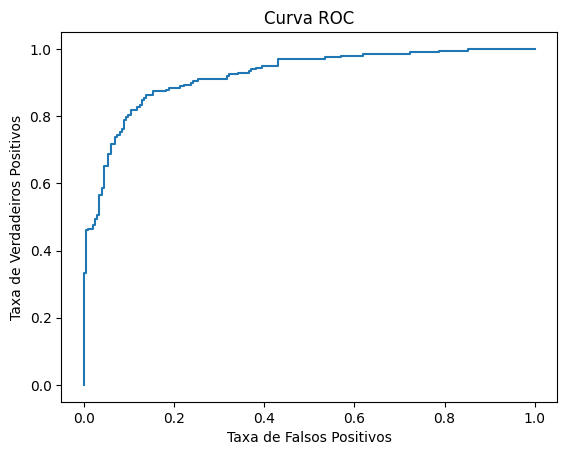

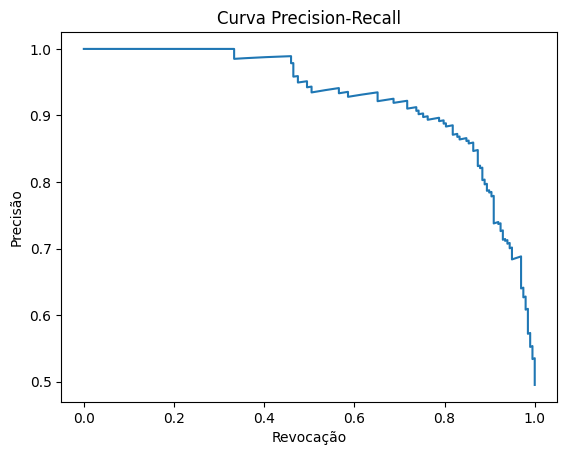

In [42]:

# Gera previsões nos dados de teste
y_pred = best_svm.predict(X_test)

# Calcula as métricas
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprime os hiperparâmetros selecionados e as métricas
print('Melhor valor de C:', best_svm.C)
print('Melhor valor de gamma:', best_svm.gamma)
print('Acurácia:', accuracy)
print('Revocação:', recall)
print('Precisão:', precision)
print('F1-score:', f1)

# Calcula os valores para a curva ROC
fpr, tpr, _ = roc_curve(y_test, best_svm.decision_function(X_test))

# Plota a curva ROC
plt.plot(fpr, tpr)
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show()

# Calcula os valores para a curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, best_svm.decision_function(X_test))

# Plota a curva Precision-Recall
plt.plot(recall, precision)
plt.xlabel('Revocação')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.show()

#*Random Forest*

In [16]:
# Separa os atributos e a variável dependente
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Divide os dados em conjuntos de treinamento e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normaliza dos dados de treinamento e teste usando as estatísticas dos dados de treinamento
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define os valores para o número de classificadores base e a máxima profundidade para o grid-search
n_estimators_values = [i for i in range(10,210,10)]
max_depth_values = [4, 6, 8, 10, None]

# Cria o modelo Random Forest
rf = RandomForestClassifier()

# Usa o grid-search para ajustar o número de classificadores base e a máxima profundidade
param_grid = {'n_estimators': n_estimators_values, 'max_depth': max_depth_values}
grid_search = GridSearchCV(rf, param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Imprime os melhores valores para o número de classificadores base e a máxima profundidade encontrados pelo grid-search
print('Melhor valor para n_estimators:', grid_search.best_params_['n_estimators'])
print('Melhor valor para max_depth:', grid_search.best_params_['max_depth'])

# Cria um novo modelo Random Forest com os melhores hiperparâmetros encontrados pelo grid-search
best_rf = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'])

# Ajusta o modelo aos dados de treinamento
best_rf.fit(X_train, y_train)

# Avalia o modelo no conjunto de teste
accuracy = best_rf.score(X_test, y_test)
print('Acurácia no conjunto de teste:', accuracy)


Melhor valor para n_estimators: 170
Melhor valor para max_depth: 10
Acurácia no conjunto de teste: 0.855


Melhor valor de n_estimators: 170
Melhor valor de max_depth: 10
Acurácia: 0.855
Revocação: 0.8787878787878788
Precisão: 0.8365384615384616
F1-score: 0.8571428571428572


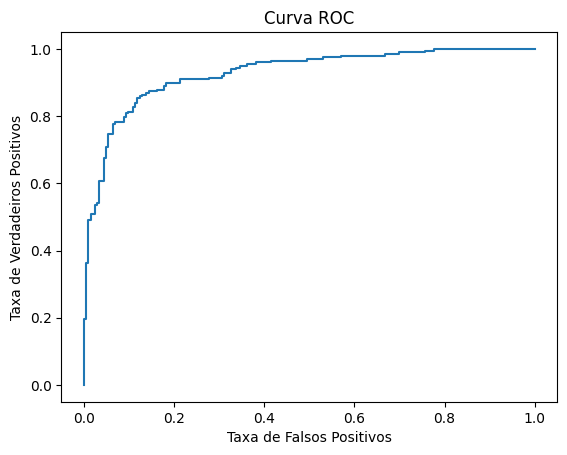

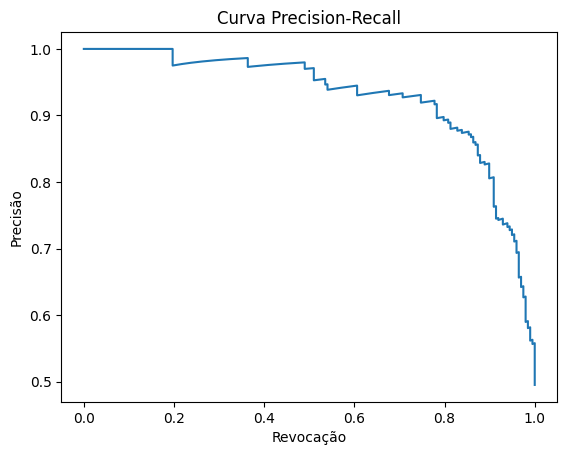

In [17]:

# Gera previsões nos dados de teste
y_pred = best_rf.predict(X_test)

# Calcula as métricas
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprime os hiperparâmetros selecionados e as métricas
print('Melhor valor de n_estimators:', best_rf.n_estimators)
print('Melhor valor de max_depth:', best_rf.max_depth)
print('Acurácia:', accuracy)
print('Revocação:', recall)
print('Precisão:', precision)
print('F1-score:', f1)

# Obtém as probabilidades previstas para cada classe
y_proba = best_rf.predict_proba(X_test)

# Calcula os valores para a curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])

# Plota a curva ROC
plt.plot(fpr, tpr)
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show()

# Calcula os valores para a curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_proba[:, 1])

# Plota a curva Precision-Recall
plt.plot(recall, precision)
plt.xlabel('Revocação')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.show()